Standard Supervised Approaches

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [4]:
# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv") 

# Print dataset head for debugging
print("Dataset preview:")
print(df.head())

# Convert is_point columns from TRUE/FALSE to 1/0
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)

# Identify feature and target columns
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print dataset statistics
print("\nTraining set:")
print(f"Total data points: {len(y_train)}")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set:")
print(f"Total data points: {len(y_test)}")
print(y_test.value_counts(normalize=True) * 100)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset preview:
   index      id  is_closed  sum_length  line_curvature  num_vertices  \
0      0  156838      False    5.799891        2.707294             6   
1      1    6898       True   14.995678        1.000000            17   
2      2    6941       True    7.000716        1.000000             5   
3      3     509      False    0.901641        1.000000             2   
4      4    9176      False    0.680246        1.000000             2   

   vertex_density  total_angle_change  is_point  num_connections  \
0        1.034502            5.269789     False                0   
1        1.133660           23.564956     False                0   
2        0.714213            4.712721     False                0   
3        2.218177            0.000000     False                0   
4        2.940115            0.000000     False                0   

   num_intersections  bounding_box_width  bounding_box_height  \
0                  1              2.0073               2.1411   
1    

In [396]:
# Train models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=20),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', random_state=42),
    "SVM (Sigmoid Kernel)": SVC(kernel='sigmoid', random_state=42)
}

for name, model in models.items():
    print(f"\n{name} Performance:")
    
    if "SVM" in name:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    for dataset, y_true, y_pred in [("Train", y_train, y_train_pred), ("Test", y_test, y_test_pred)]:
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0
        
        print(f"\n{name} - {dataset} set:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
        print(classification_report(y_true, y_pred))
    
    # Cross-validation
    scores = cross_val_score(model, X_train_scaled if "SVM" in name else X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean cross-validation accuracy: {scores.mean():.4f}")





Decision Tree Performance:

Decision Tree - Train set:
Accuracy: 1.0000
F1-score: 1.0000
False Positives: 0
False Negatives: 0
Percentage of Errors Correctly Identified: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7990
           1       1.00      1.00      1.00       493

    accuracy                           1.00      8483
   macro avg       1.00      1.00      1.00      8483
weighted avg       1.00      1.00      1.00      8483


Decision Tree - Test set:
Accuracy: 0.9958
F1-score: 0.9607
False Positives: 8
False Negatives: 1
Percentage of Errors Correctly Identified: 99.10%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       0.93      0.99      0.96       111

    accuracy                           1.00      2121
   macro avg       0.97      0.99      0.98      2121
weighted avg       1.00      1.00      1.00      2121

Cross-validation a

Data Augmentation + Supervised Approaches

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE  # For augmenting the minority class

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")  
# Convert is_point columns from TRUE/FALSE to 1/0
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)

# Identify feature and target columns
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print dataset statistics after applying SMOTE
print("\nTraining set after SMOTE:")
print(f"Total data points: {len(y_train_res)}")
print(y_train_res.value_counts(normalize=True) * 100)

print("\nTest set (original):")
print(f"Total data points: {len(y_test)}")
print(y_test.value_counts(normalize=True) * 100)

# Standardize features for SVM and Decision Tree
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_res)
y_train_rf_pred = rf_model.predict(X_train_scaled)
y_test_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
for dataset, y_true, y_pred in [("Train", y_train_res, y_train_rf_pred), ("Test", y_test, y_test_rf_pred)]:
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0

    print(f"\nRandom Forest - {dataset} set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
    print(classification_report(y_true, y_pred))

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_res)
y_train_dt_pred = dt_model.predict(X_train_scaled)
y_test_dt_pred = dt_model.predict(X_test_scaled)

# Evaluate Decision Tree
print("\nDecision Tree Performance:")
for dataset, y_true, y_pred in [("Train", y_train_res, y_train_dt_pred), ("Test", y_test, y_test_dt_pred)]:
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0

    print(f"\nDecision Tree - {dataset} set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
    print(classification_report(y_true, y_pred))

# Identify errors while keeping id and index
errors = df.loc[df[target_col] == 1, ["id", "index"]]
errors.to_csv("identified_errors.csv", index=False)
print("Errors identified and saved to identified_errors.csv")



Training set after SMOTE:
Total data points: 15980
Error
0    50.0
1    50.0
Name: proportion, dtype: float64

Test set (original):
Total data points: 2121
Error
0    94.76662
1     5.23338
Name: proportion, dtype: float64

Random Forest Performance:

Random Forest - Train set:
Accuracy: 1.0000
F1-score: 1.0000
False Positives: 0
False Negatives: 0
Percentage of Errors Correctly Identified: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7990
           1       1.00      1.00      1.00      7990

    accuracy                           1.00     15980
   macro avg       1.00      1.00      1.00     15980
weighted avg       1.00      1.00      1.00     15980


Random Forest - Test set:
Accuracy: 0.9967
F1-score: 0.9689
False Positives: 5
False Negatives: 2
Percentage of Errors Correctly Identified: 98.20%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1

Decision Tree Visual

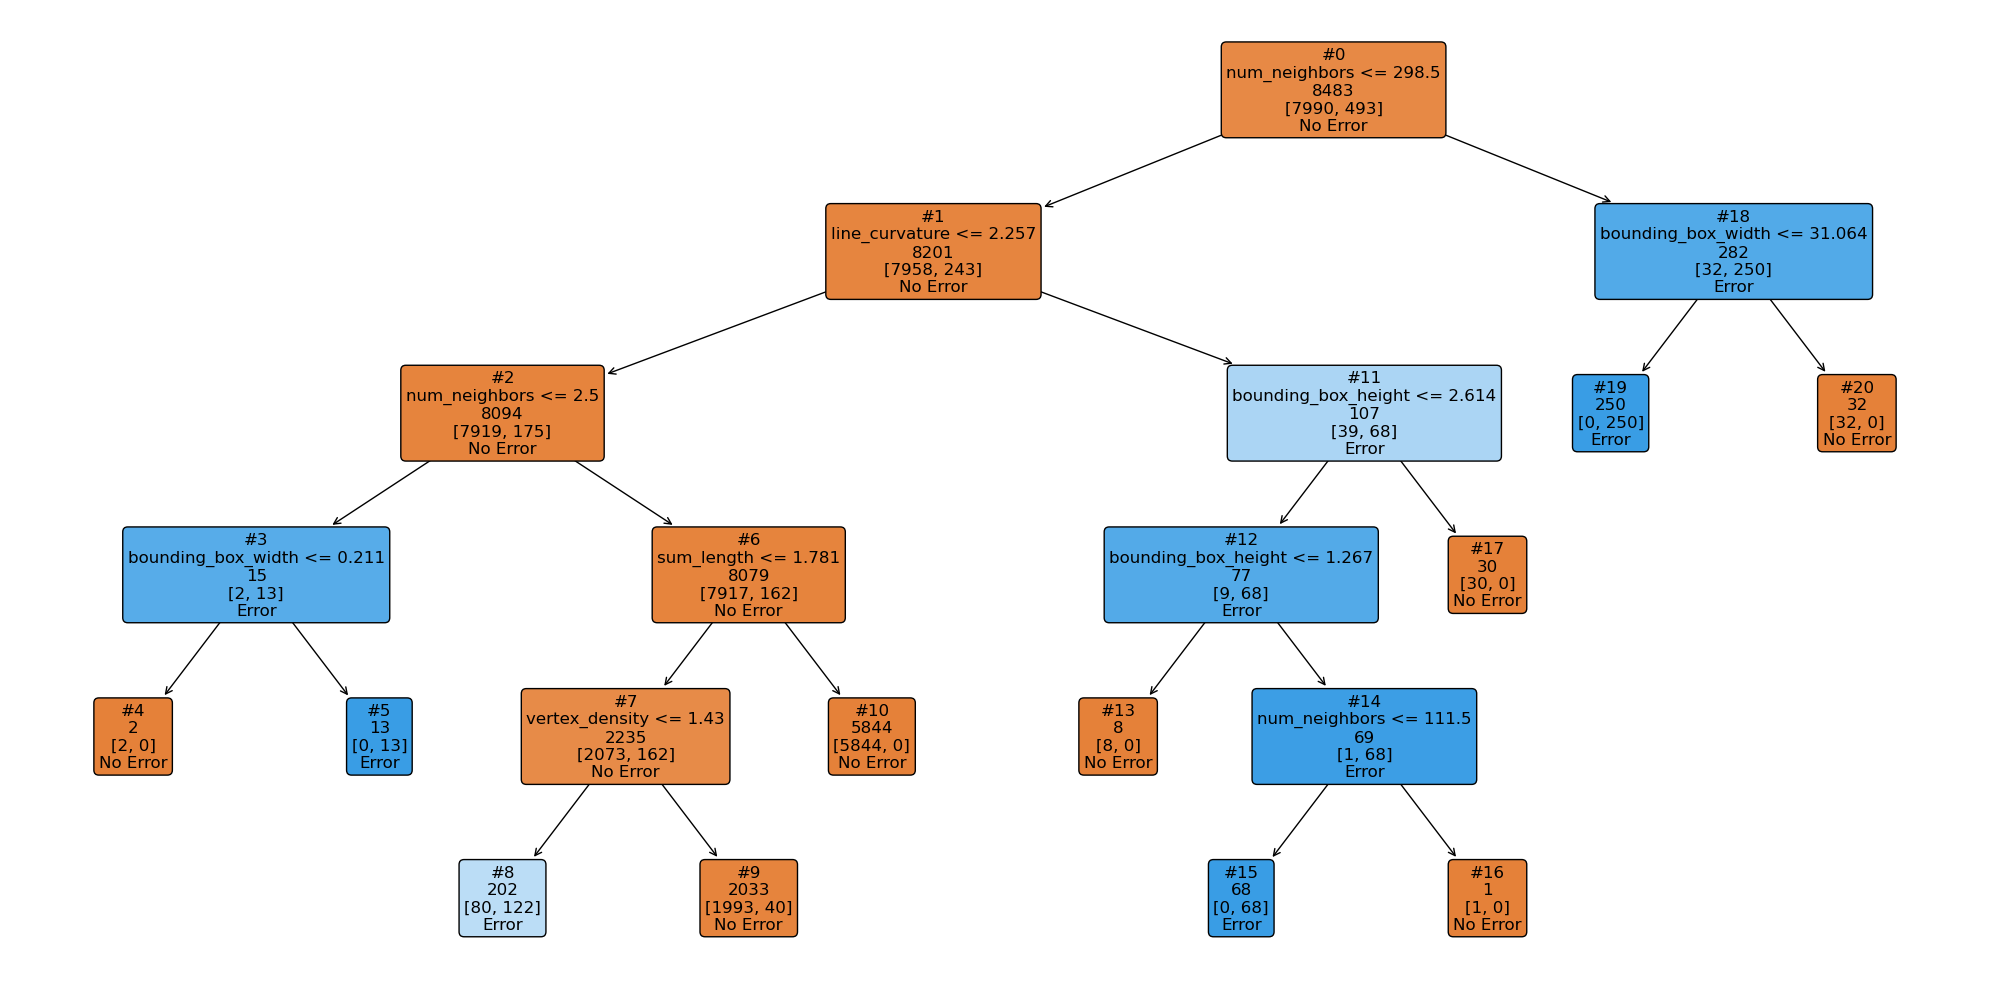

In [398]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for clarity
dt_model.fit(X_train, y_train)

# Convert the feature names to a list
feature_names = X_train.columns.tolist()

# Plot the decision tree with proper labels at the correct locations
plt.figure(figsize=(20, 10))  # Set a bigger figure for better readability
plot_tree(dt_model, 
          filled=True,  # Color nodes based on class
          feature_names=feature_names,  # Use the feature names for better readability
          class_names=['No Error', 'Error'],  # Classes of the target (0=No Error, 1=Error)
          rounded=True,  # Round corners of the nodes
          fontsize=12,   # Set font size
          label='none',   # Show the class label at all nodes
          impurity=False,  # Remove impurity values for clarity
          node_ids=True)  # Show node ids to help track node structure

# Show plot with boxes around nodes
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


Ensemble Methods based on decision trees

In [4]:
# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")  
# Print dataset head for debugging
print("Dataset preview:")
print(df.head())

# Convert is_point columns from TRUE/FALSE to 1/0
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)

# Identify feature and target columns
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Print dataset statistics
print("\nTraining set:")
print(f"Total data points: {len(y_train)}")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set:")
print(f"Total data points: {len(y_test)}")
print(y_test.value_counts(normalize=True) * 100)

# Standardize features for SVM and others that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset preview:
   index      id  is_closed  sum_length  line_curvature  num_vertices  \
0      0  156838      False    5.799891        2.707294             6   
1      1    6898       True   14.995678        1.000000            17   
2      2    6941       True    7.000716        1.000000             5   
3      3     509      False    0.901641        1.000000             2   
4      4    9176      False    0.680246        1.000000             2   

   vertex_density  total_angle_change  is_point  num_connections  \
0        1.034502            5.269789     False                0   
1        1.133660           23.564956     False                0   
2        0.714213            4.712721     False                0   
3        2.218177            0.000000     False                0   
4        2.940115            0.000000     False                0   

   num_intersections  bounding_box_width  bounding_box_height  \
0                  1              2.0073               2.1411   
1    

In [5]:
# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', degree=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Performance:")
    
    # For models requiring scaling (SVM, XGBoost, GradientBoosting, LightGBM)
    if name in ["SVM (Polynomial Kernel)", "XGBoost", "Gradient Boosting", "LightGBM"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    for dataset, y_true, y_pred in [("Train", y_train, y_train_pred), ("Test", y_test, y_test_pred)]:
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0
        
        print(f"\n{name} - {dataset} set:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
        print(classification_report(y_true, y_pred))
        
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled if name in ["SVM (Polynomial Kernel)", "XGBoost", "Gradient Boosting", "LightGBM"] else X_train, y_train, cv=5, scoring='accuracy')
    print(f"\n{name} - Cross-validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

<class 'NameError'>: name 'KNeighborsClassifier' is not defined

Classification with Ensembles based on logistic regression

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


# Identify feature and target columns
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Ensemble Methods
ensemble_models = {
    "Voting Classifier": VotingClassifier(estimators=[('lr', models["Logistic Regression"]),
                                                      ('rf', models["Random Forest"]),
                                                      ('svm', models["SVM (Linear)"])], voting='hard'),
    "Stacking Classifier": StackingClassifier(estimators=[('lr', models["Logistic Regression"]),
                                                          ('rf', models["Random Forest"]),
                                                          ('svm', models["SVM (Linear)"])],
                                              final_estimator=LogisticRegression()),
    "AdaBoost with Logistic Regression": AdaBoostClassifier(models["Logistic Regression"], random_state=42),
    "Bagging with Logistic Regression": BaggingClassifier(models["Logistic Regression"], random_state=42),
}

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0
    return accuracy, f1, fp, fn, percent_errors_identified

# Train and evaluate models
for name, model in {**models, **ensemble_models}.items():
    print(f"\n{name} Performance:")

    # Cross-validation scores (using 5-fold CV)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy (mean): {cv_scores.mean():.4f}")
    
    if isinstance(model, LogisticRegression) or isinstance(model, KNeighborsClassifier) or isinstance(model, SVC):
        # Base models
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        # Ensemble methods
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    
    # For train and test metrics
    for dataset, y_true, y_pred in [("Train", y_train, y_train_pred), ("Test", y_test, y_test_pred)]:
        accuracy, f1, fp, fn, percent_errors_identified = compute_metrics(y_true, y_pred)
        
        print(f"\n{name} - {dataset} set:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
        print(classification_report(y_true, y_pred))



Logistic Regression Performance:
Cross-validation accuracy (mean): 0.9690

Logistic Regression - Train set:
Accuracy: 0.9696
F1-score: 0.6587
False Positives: 14
False Negatives: 244
Percentage of Errors Correctly Identified: 50.51%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7990
           1       0.95      0.51      0.66       493

    accuracy                           0.97      8483
   macro avg       0.96      0.75      0.82      8483
weighted avg       0.97      0.97      0.97      8483


Logistic Regression - Test set:
Accuracy: 0.9727
F1-score: 0.6628
False Positives: 4
False Negatives: 54
Percentage of Errors Correctly Identified: 51.35%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2010
           1       0.93      0.51      0.66       111

    accuracy                           0.97      2121
   macro avg       0.95      0.76      0.82      2121
weighted av

C:\Users\twool\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\twool\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\twool\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\twool\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

Cross-validation accuracy (mean): 0.9556


C:\Users\twool\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost with Logistic Regression - Train set:
Accuracy: 0.9553
F1-score: 0.3897
False Positives: 7
False Negatives: 372
Percentage of Errors Correctly Identified: 24.54%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7990
           1       0.95      0.25      0.39       493

    accuracy                           0.96      8483
   macro avg       0.95      0.62      0.68      8483
weighted avg       0.95      0.96      0.94      8483


AdaBoost with Logistic Regression - Test set:
Accuracy: 0.9609
F1-score: 0.4196
False Positives: 2
False Negatives: 81
Percentage of Errors Correctly Identified: 27.03%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2010
           1       0.94      0.27      0.42       111

    accuracy                           0.96      2121
   macro avg       0.95      0.63      0.70      2121
weighted avg       0.96      0.96      0.95      2121


Bag

Neural Networks

In [403]:
from sklearn.neural_network import MLPClassifier

# Define MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,20), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on train and test data
y_train_pred_mlp = mlp.predict(X_train_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0
    return accuracy, f1, fp, fn, percent_errors_identified

# Print MLP Performance
print("\nMLP Classifier Performance:")

for dataset, y_true, y_pred in [("Train", y_train, y_train_pred_mlp), ("Test", y_test, y_test_pred_mlp)]:
    accuracy, f1, fp, fn, percent_errors_identified = compute_metrics(y_true, y_pred)
    
    print(f"\nMLP - {dataset} set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
    print(classification_report(y_true, y_pred))



MLP Classifier Performance:

MLP - Train set:
Accuracy: 0.9976
F1-score: 0.9795
False Positives: 4
False Negatives: 16
Percentage of Errors Correctly Identified: 96.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7990
           1       0.99      0.97      0.98       493

    accuracy                           1.00      8483
   macro avg       0.99      0.98      0.99      8483
weighted avg       1.00      1.00      1.00      8483


MLP - Test set:
Accuracy: 0.9962
F1-score: 0.9633
False Positives: 2
False Negatives: 6
Percentage of Errors Correctly Identified: 94.59%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       0.98      0.95      0.96       111

    accuracy                           1.00      2121
   macro avg       0.99      0.97      0.98      2121
weighted avg       1.00      1.00      1.00      2121

